In [243]:
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
from pypsa.plot import add_legend_lines, add_legend_patches, add_legend_semicircles


In [244]:
fn = "results/test-elec/networks/base_s_5_elec_.nc"
n = pypsa.Network(fn)
stat = n.statistics()


INFO:pypsa.io:Imported network base_s_5_elec_.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [245]:
n.carriers

,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
AC,0.0000,#70af1d,AC,inf,0.0
DC,0.0000,#8a1caf,DC,inf,0.0
biomass,0.0000,#baa741,biomass,inf,0.0
oil,0.2571,#c9c9c9,oil,inf,0.0
CCGT,0.1980,#a85522,Combined-Cycle Gas,inf,0.0
nuclear,0.0000,#ff8c00,nuclear,inf,0.0
solar-hsat,0.0000,#fdb915,solar-hsat,inf,0.0
offwind-dc,0.0000,#74c6f2,Offshore Wind (DC),inf,0.0
offwind-float,0.0000,#b5e2fa,Offshore Wind (Floating),inf,0.0


/opt/anaconda3/envs/pypsa-eur/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x39134abd0>,
 <matplotlib.collections.LineCollection at 0x398b57770>)

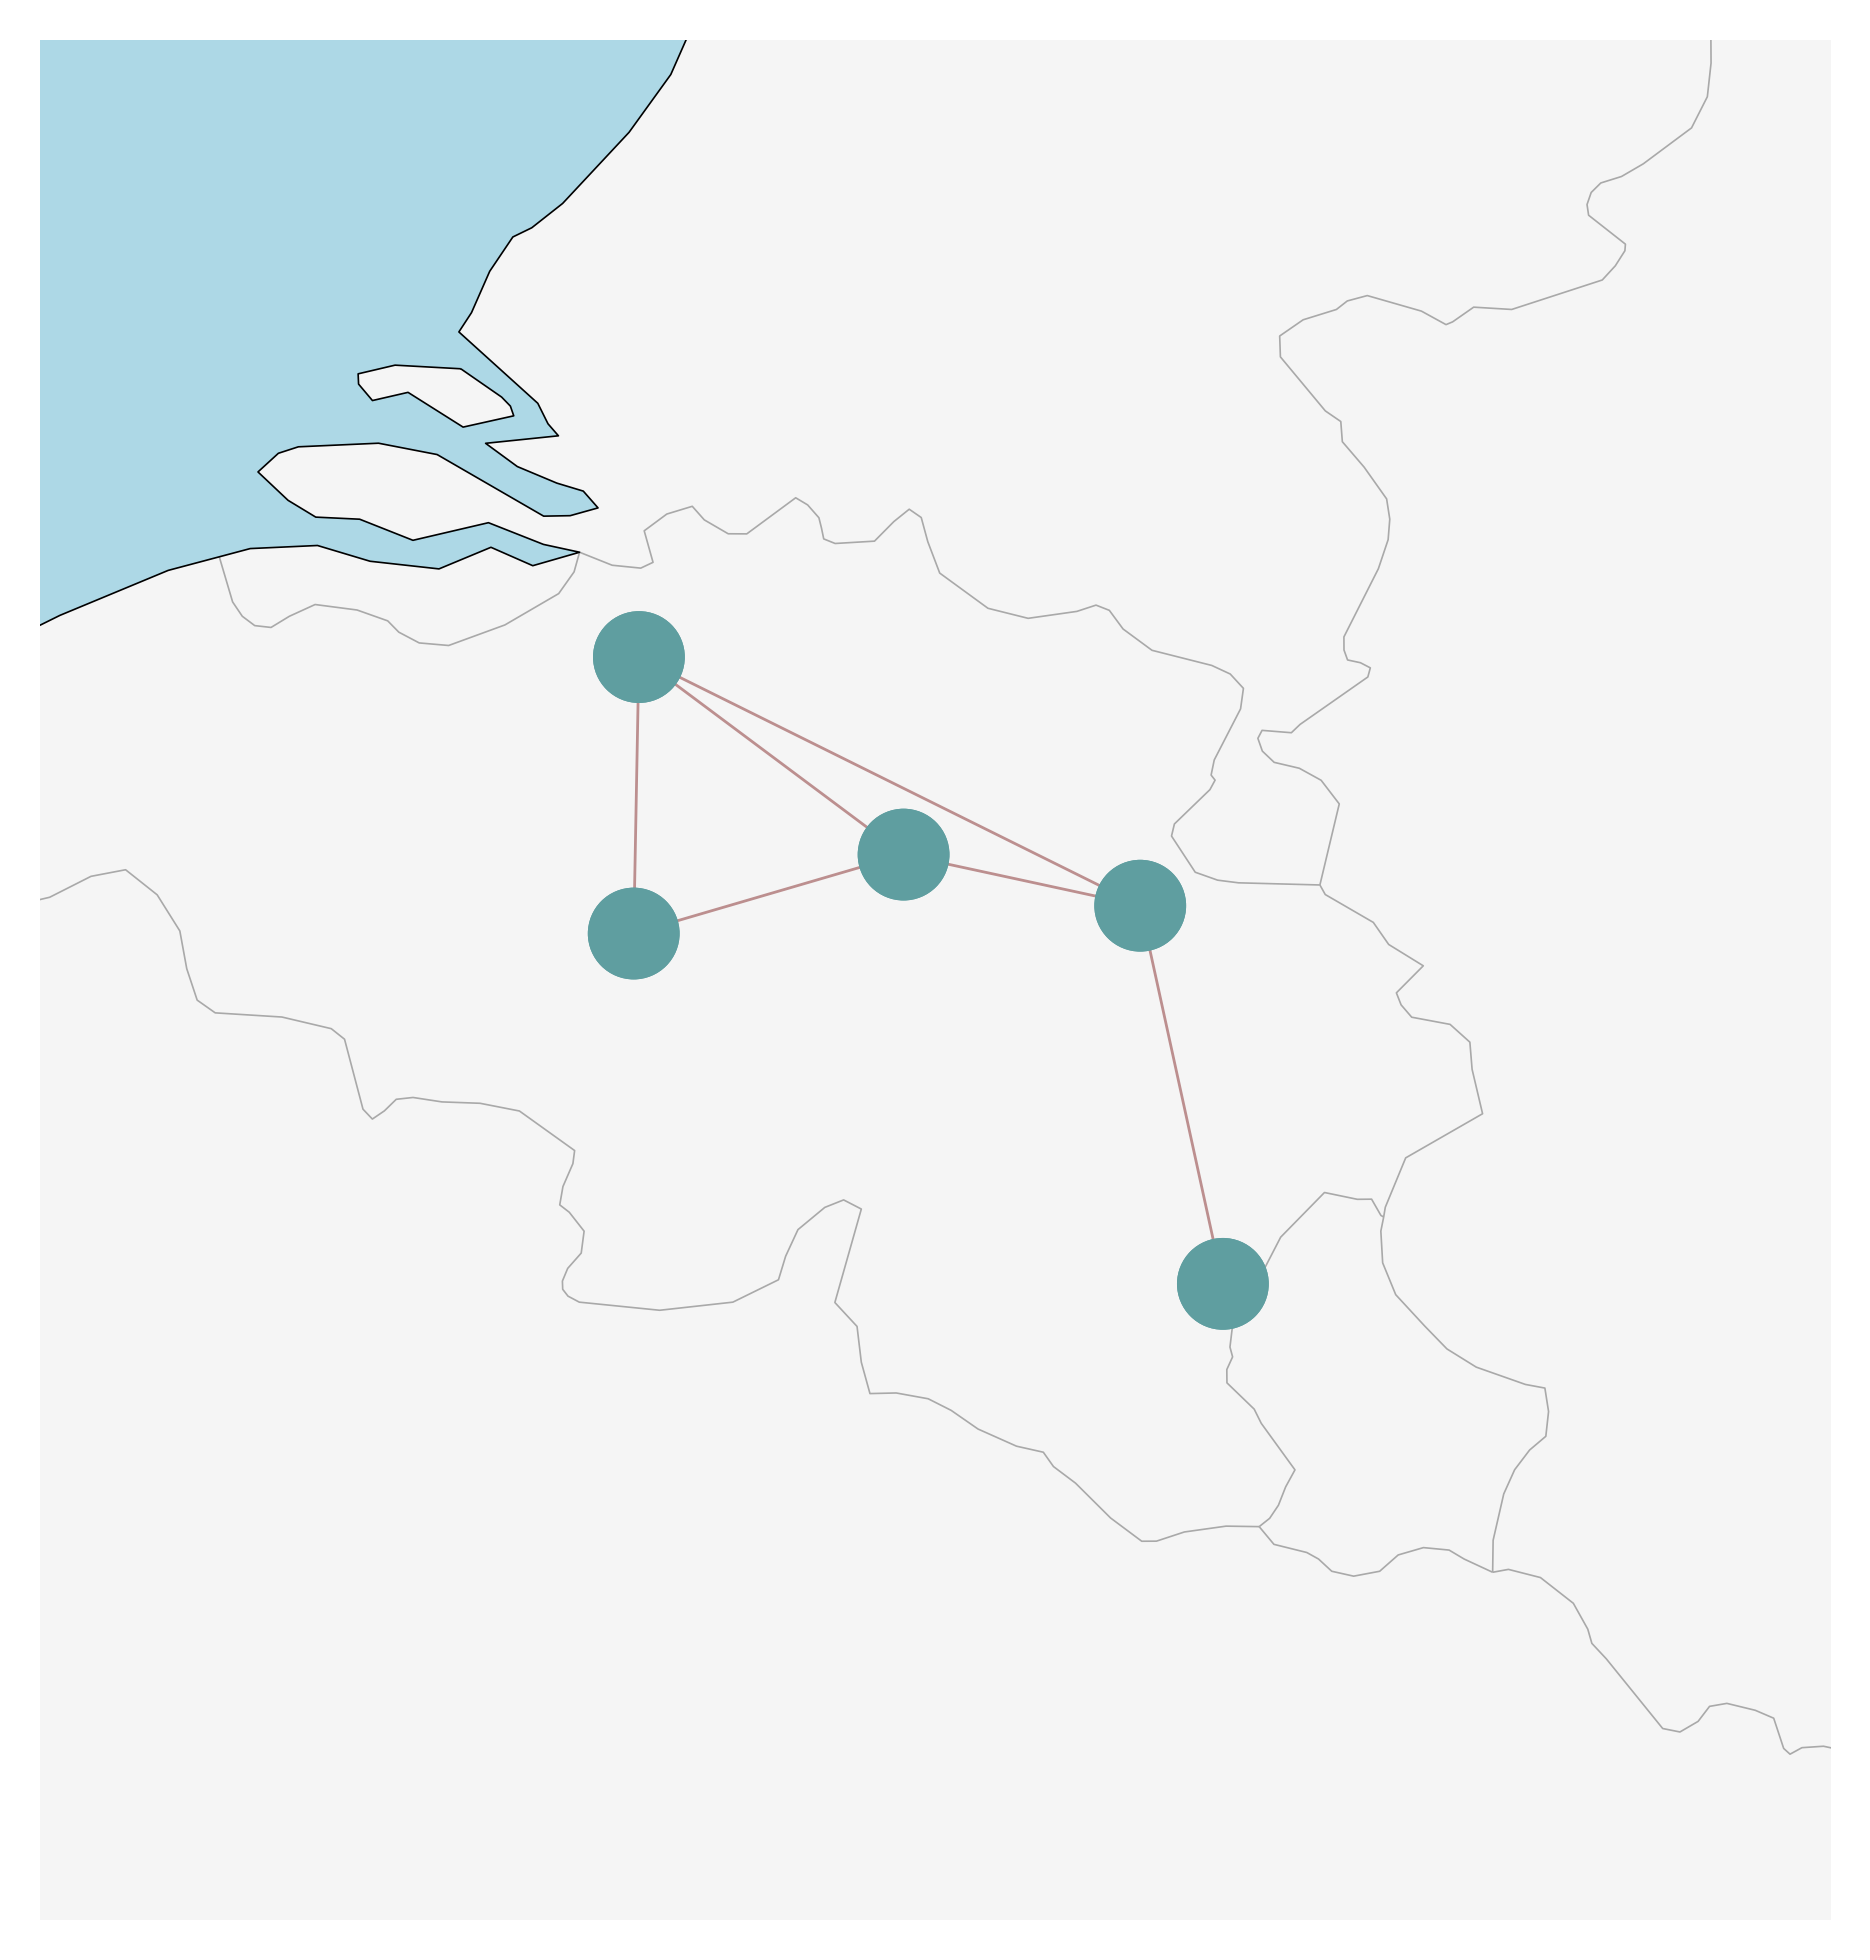

In [246]:
fig, ax = plt.subplots(figsize=(5,5), subplot_kw={"projection": ccrs.EqualEarth()})
n.plot( bus_sizes=0.01, line_widths=0.5, ax=ax, margin=1, color_geomap=True )

In [247]:
colors = {
    "Multiple": "pink",
    "AC": "black",
    "DC":"darkviolet",
    "biomass" : "forestgreen",
    "Brown Coal": "saddlebrown",
    "Combined-Cycle Gas": "darkorange",
    "Geothermal": "firebrick",
    "Hard Coal": "darkslategray",
    "nuclear": "mediumorchid",
    "oil": "peru",
    "Other": "dimgray",
    "Pumped Hydro": "cornflowerblue",
    "Run of River": "royalblue",
    "Solar": "gold",
    "Storage Hydro": "navy",
    "Waste": "olive",
    "Offshore Wind (AC)": "teal",
    "Onshore Wind": "turquoise",
    "solar-hsat": "goldenrod",
    "Offshore Wind (DC)": "deepskyblue",
    "Offshore Wind (Floating)": "dodgerblue",
    "Battery Storage" : "orange",
    "Hydrogen Storage" : "lightgray",
    "H2 fuel cell": "lightgray",
    "H2 electrolysis": "lightgray",
    "-": "darkred",
    "": "darkred",
}

n.carriers.color = n.carriers.nice_name.map(colors)



In [248]:
n.carriers.color

Carrier
AC                        black
DC                   darkviolet
biomass             forestgreen
oil                        peru
CCGT                 darkorange
nuclear            mediumorchid
solar-hsat            goldenrod
offwind-dc          deepskyblue
offwind-float        dodgerblue
onwind                turquoise
offwind-ac                 teal
solar                      gold
battery                  orange
H2                    lightgray
                        darkred
H2 fuel cell          lightgray
H2 electrolysis       lightgray
Name: color, dtype: object

/opt/anaconda3/envs/pypsa-eur/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x3a9175bb0>,
 <matplotlib.collections.LineCollection at 0x3a20f1c70>)

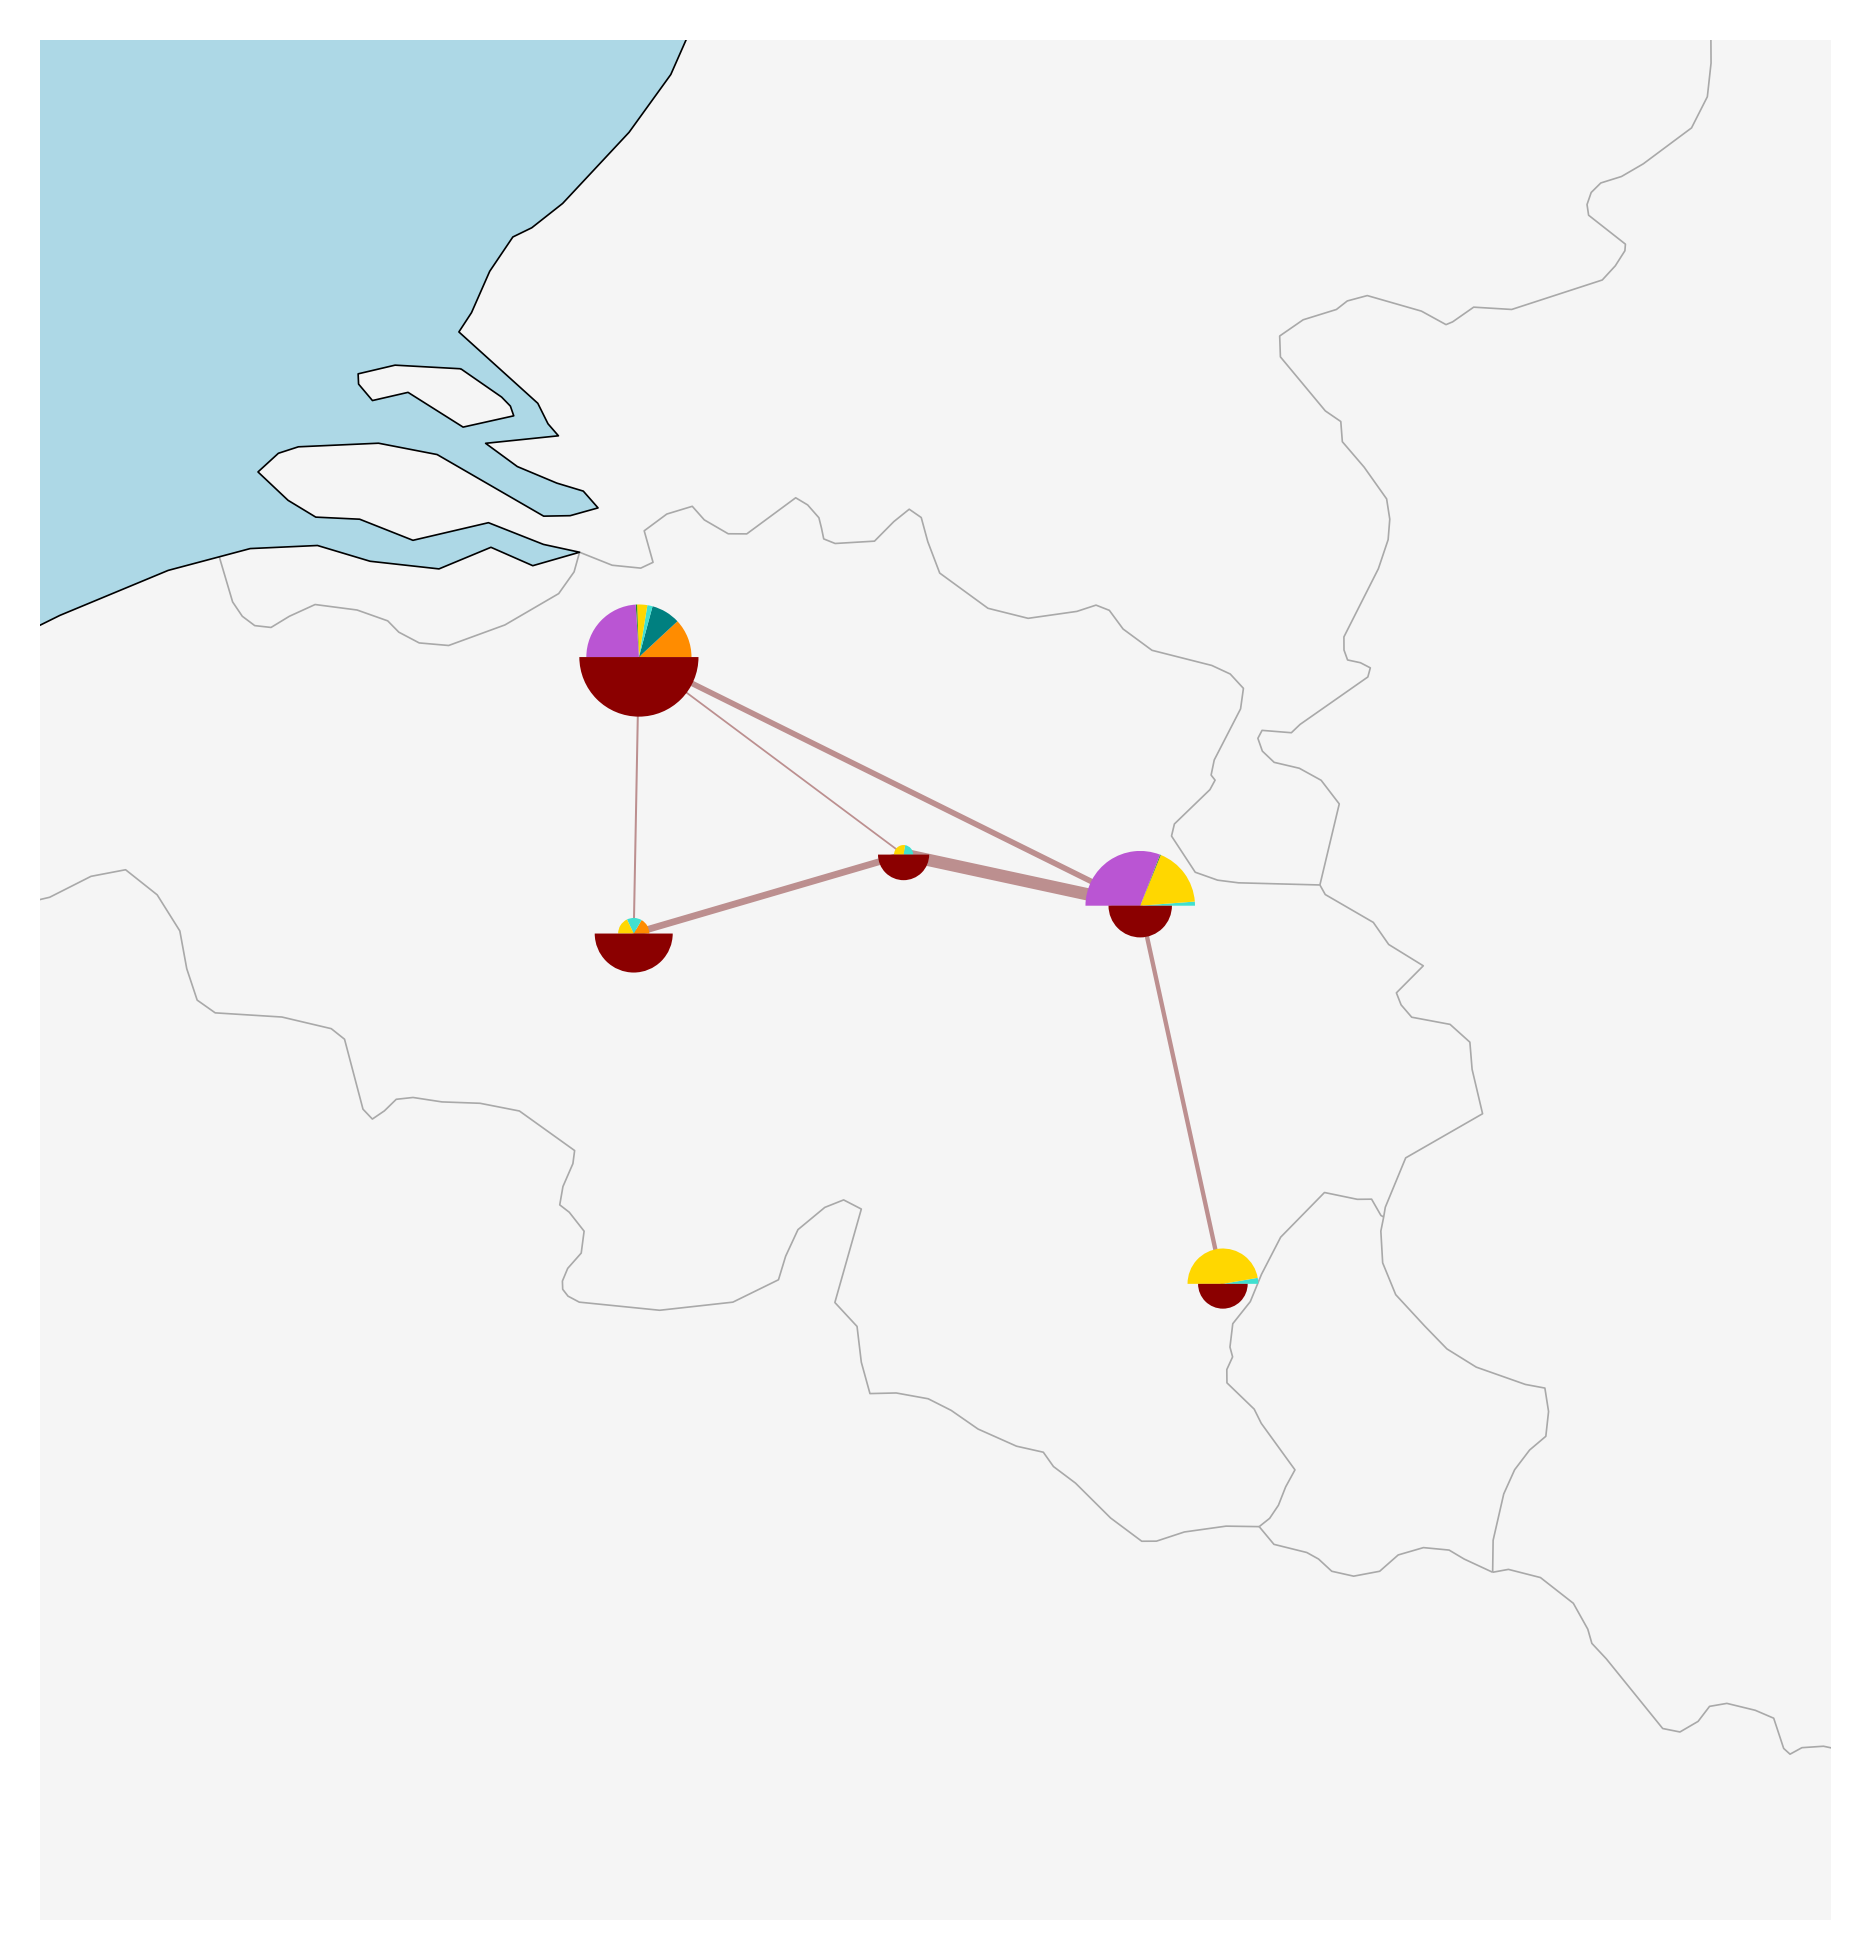

In [249]:
line_flow = n.lines_t.p0.sum(axis=0)
link_flow = n.links_t.p0.sum(axis=0)

eb = (
    n.statistics.energy_balance(
        groupby=["bus", "carrier"],
        comps=["Generator", "Load", "StorageUnit"],
    )
    .groupby([ "bus","carrier"])
    .sum()
)

bus_size_factor = 1e8
branch_width_factor = 8e3
branch_flow_factor = 8e4

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={"projection": ccrs.EqualEarth()})

n.plot(
    ax=ax,
    bus_sizes=eb / bus_size_factor,
    bus_split_circles=True,
    line_widths=line_flow / branch_width_factor,
    link_widths=link_flow / branch_width_factor,
    bus_colors=colors,
    margin=1,
    color_geomap=True

)



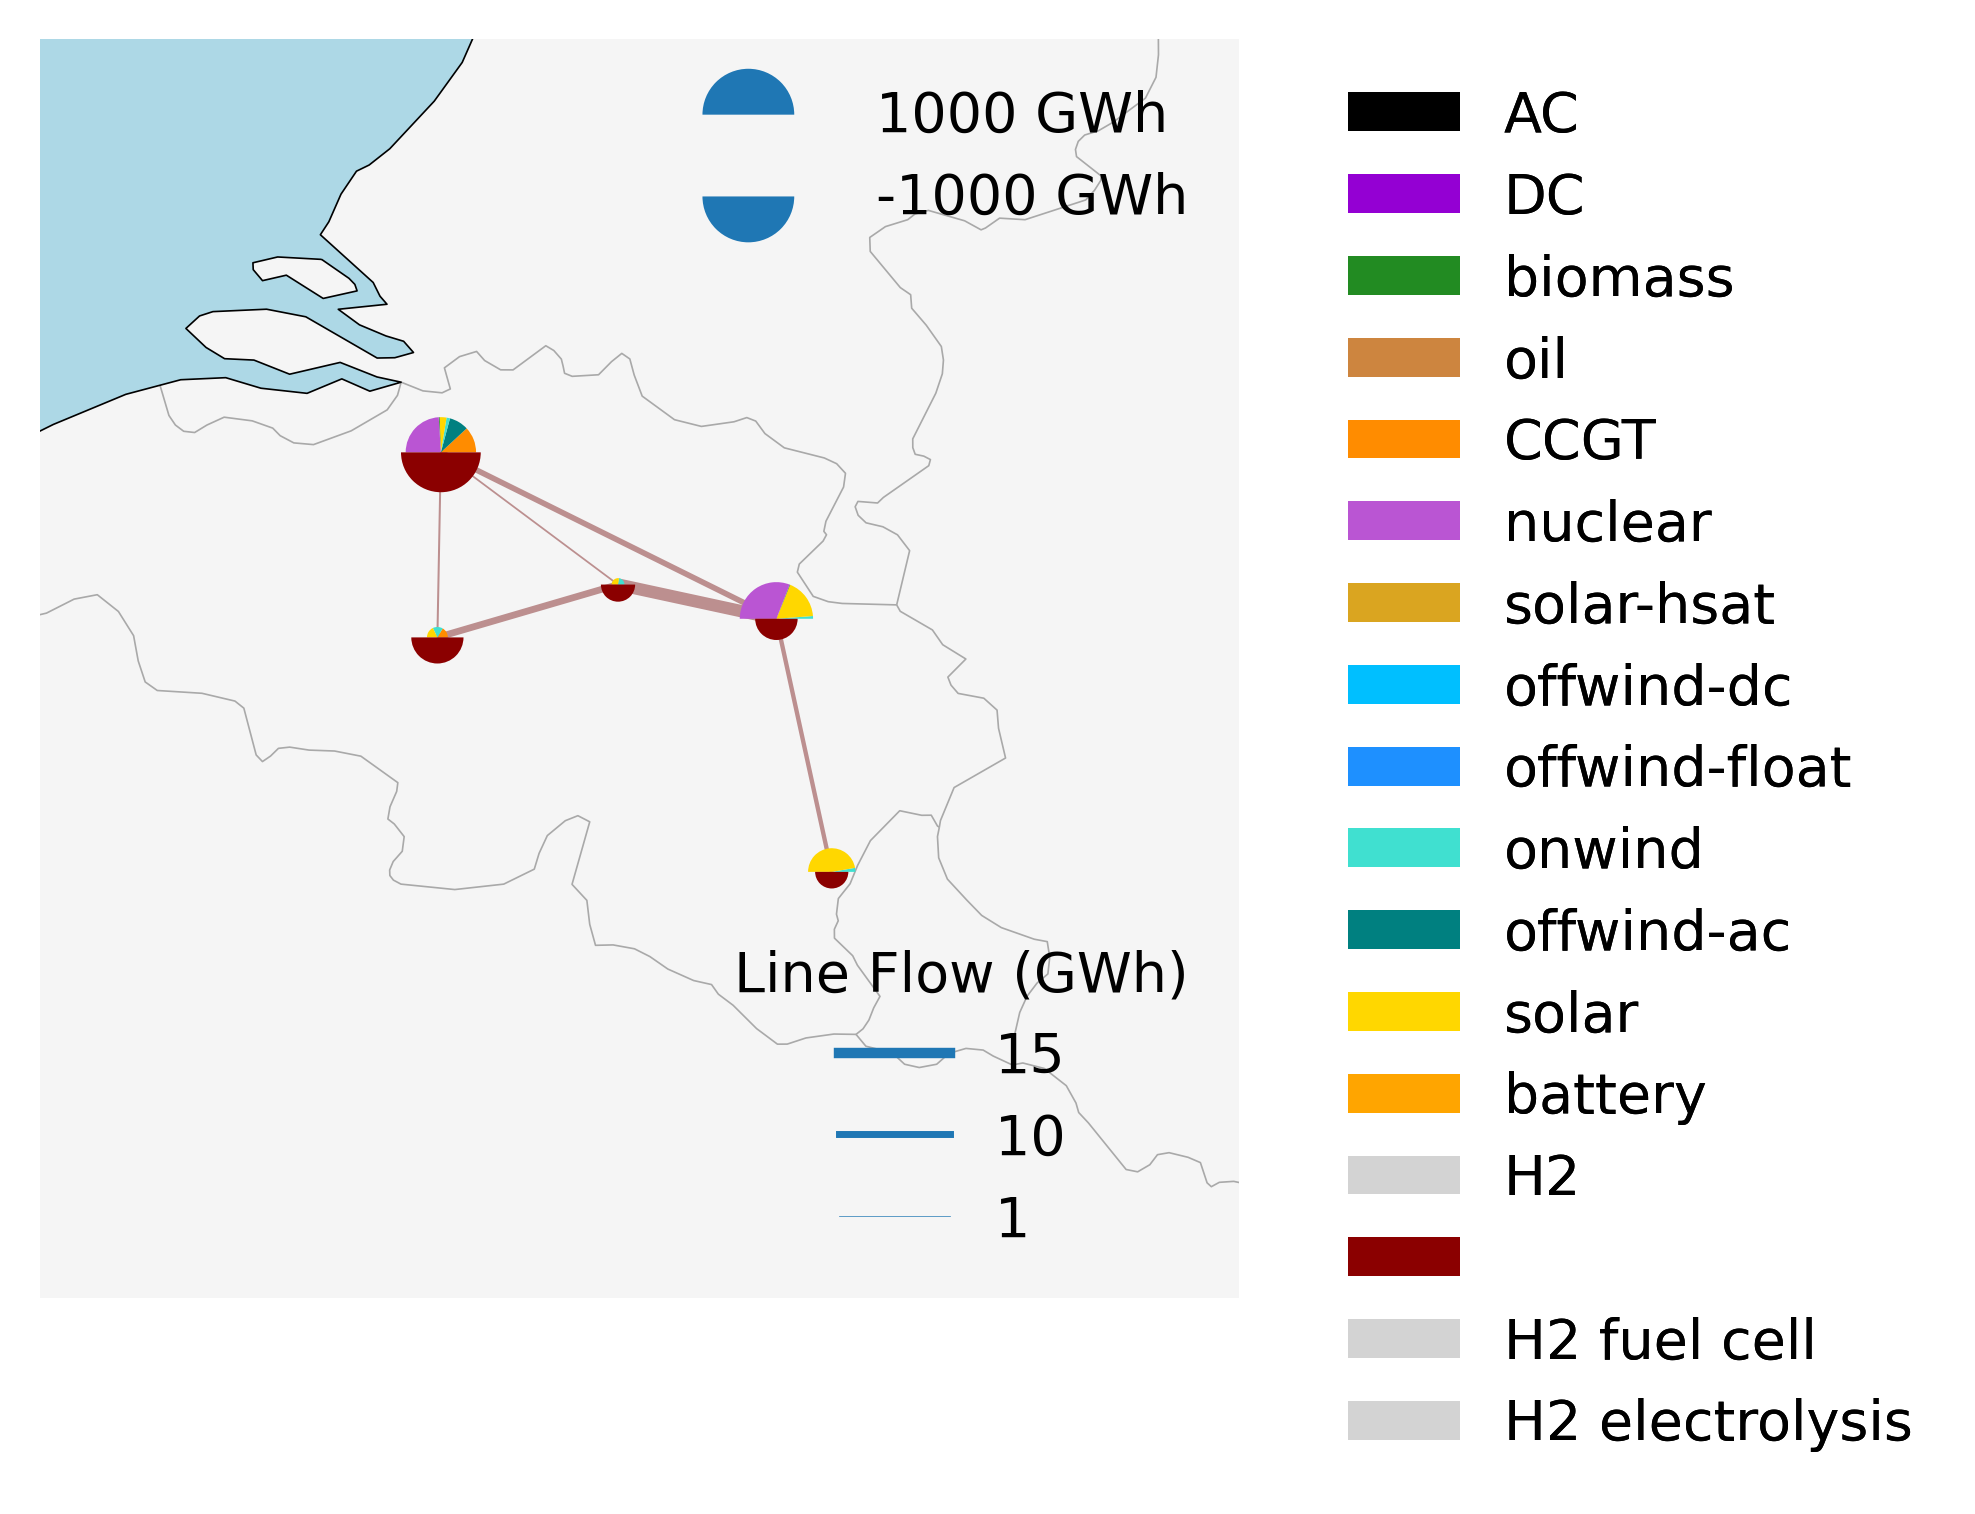

In [250]:
add_legend_lines(ax, 
            sizes= [branch/branch_width_factor for branch in [15000 ,10000, 1000]],
            labels= ["15", "10 ", "1 "],
            legend_kw = {"loc": "lower right", "frameon":False, "title":"Line Flow (GWh)"}
            )

add_legend_semicircles (ax,
            sizes= [bus/bus_size_factor for bus in [1000000, -1000000]],
            labels= ["1000 GWh", "-1000 GWh"],
            legend_kw= {"loc":'upper right', "frameon":False}
)

add_legend_patches(
    ax,
    colors=list(n.carriers.color),  # colors
    labels=list(n.carriers.index),  # labels
    legend_kw={
        "loc": "upper left",
        "bbox_to_anchor": (1.05, 1),
        "ncol": 1,
        "frameon": False,
    },
)


fig

In [251]:

print(f"Max line flow: {line_flow.abs().max()}")
print(f"Min line flow: {line_flow.abs().min()}")

print(f" Max node energy balance: {eb.groupby(['bus', 'carrier']).sum().abs().max()}")
print(f" Min node energy balance: {eb.groupby(['bus', 'carrier']).sum().abs().min()}")

Max line flow: 17864.133721593127
Min line flow: 2550.780227693373
 Max node energy balance: 842633.09479
 Min node energy balance: 3600.0


<Axes: xlabel='carrier'>

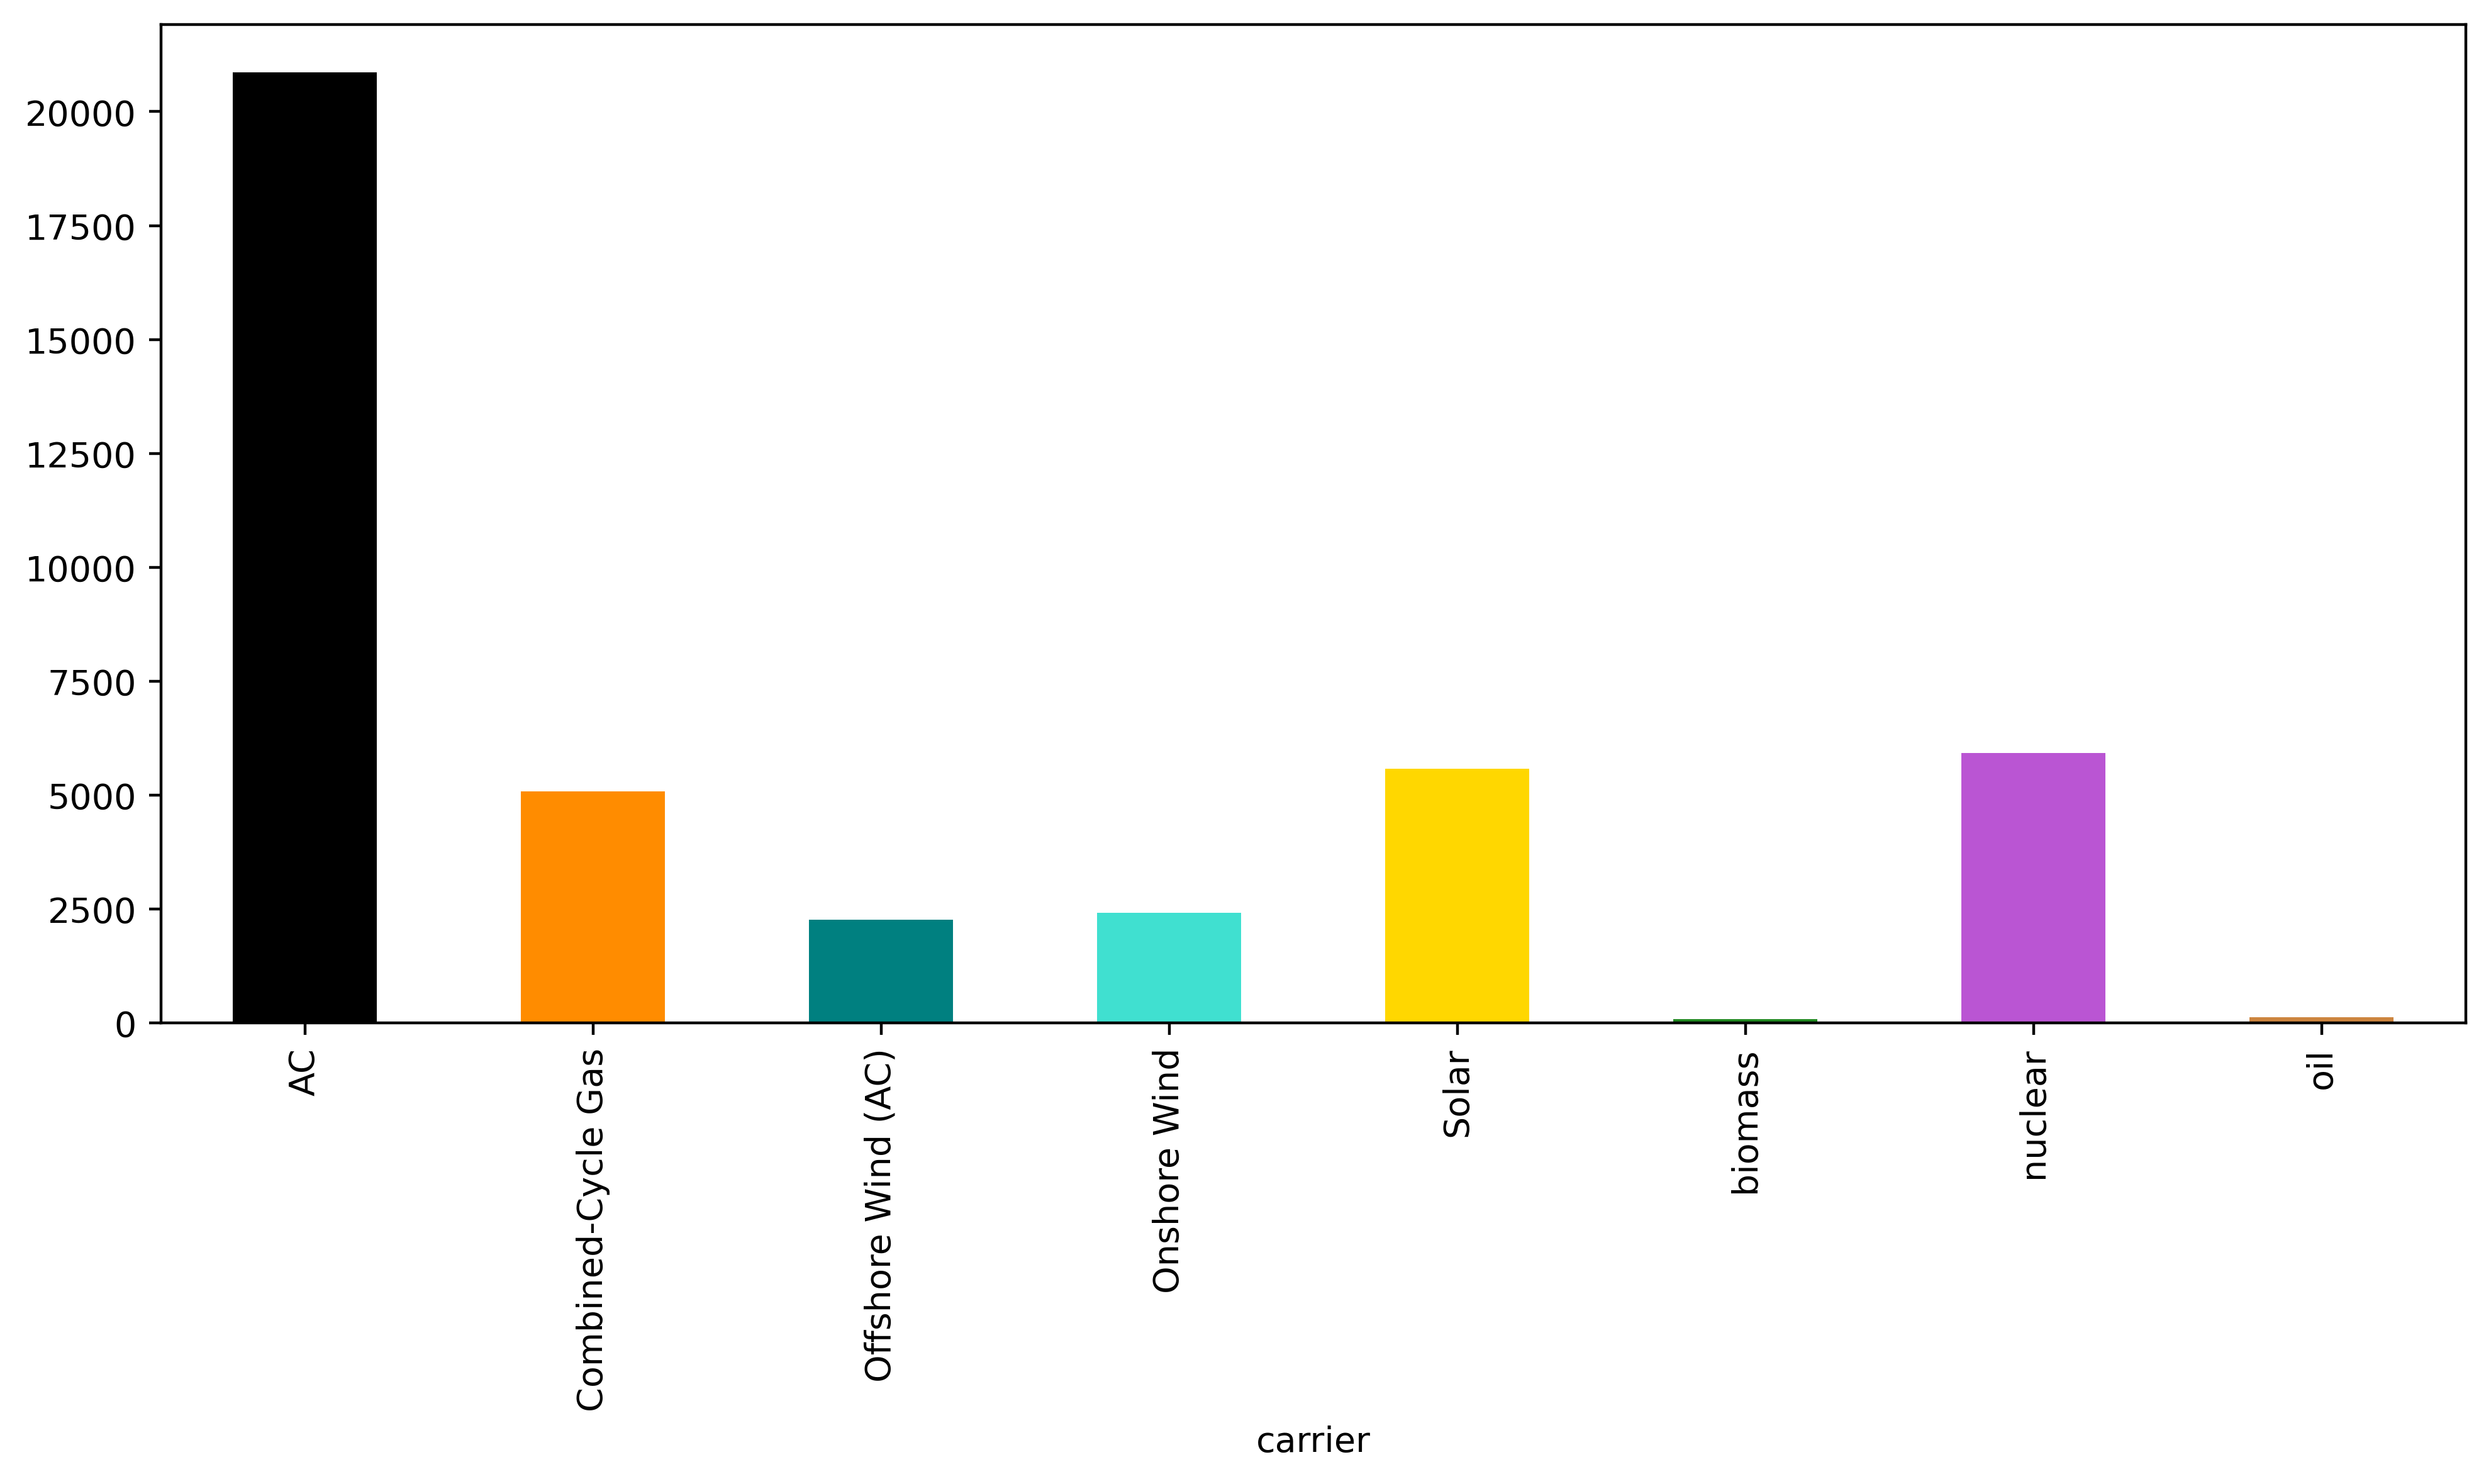

In [252]:
stat=n.statistics.installed_capacity(groupby=["carrier"]).groupby(['carrier']).sum()


fig,ax=plt.subplots(figsize=(10,6))
color_list = [colors.get(c, "gray") for c in stat.index]
stat.plot.bar(ax=ax, color=color_list)


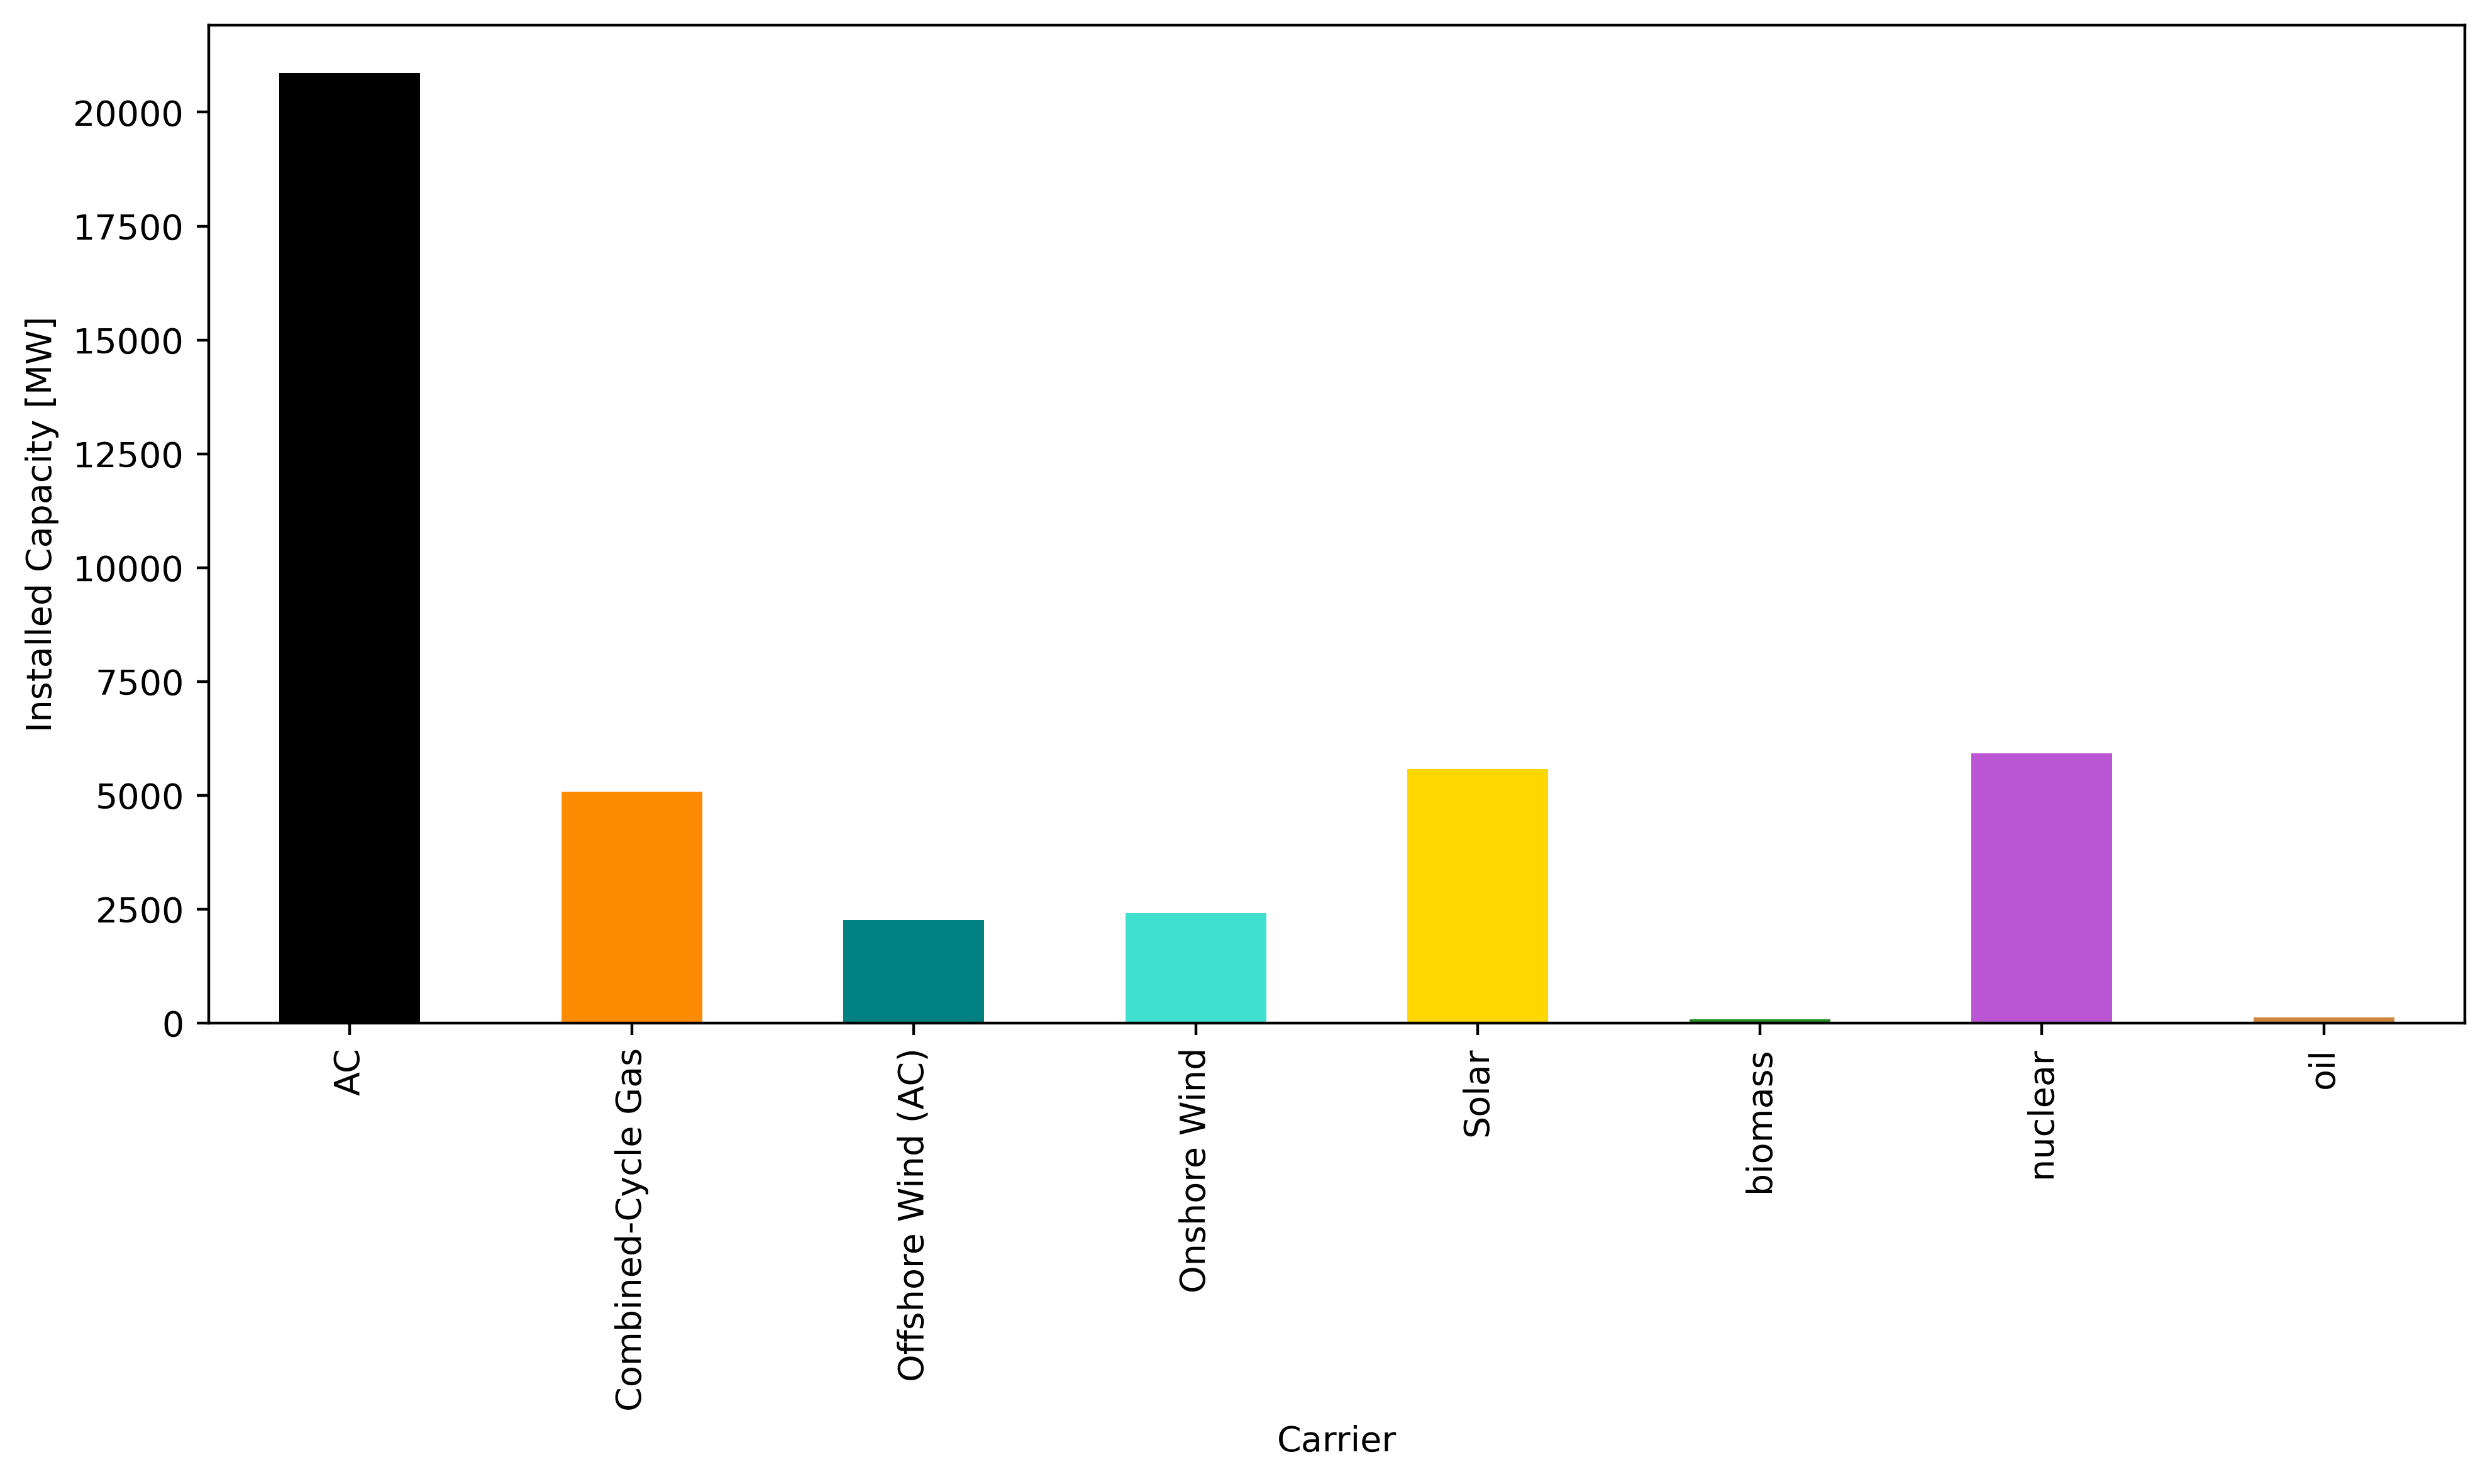

In [257]:
ax.set_ylabel('Installed Capacity [MW]')
ax.set_xlabel('Carrier')

fig